In [21]:
import subprocess
import matplotlib.pyplot as plt
import pandas as pd

# Constants

In [22]:
RESULTS_DIR = 'results'
FLOW_DIR = 'flow'
CWND_DIR = 'cwnd'
CONGESTION_MECHANISMS_PREFIX = 'ns3::Tcp'

CONGESTION_MECHANISMS = [
    'LinuxReno',
    'Vegas',
    # 'Bbr',
    # 'Ledbat',
    # 'Cubic',
    # 'Bic',
    # 'HighSpeed',
    # 'Htcp',
    # 'Hybla',
    # 'Illinois',
    # 'Lp',
    # 'Scalable',
    # 'Veno',
    # 'WestwoodPlus',
    # 'Yeah'
]

# Generate Flow Stats

In [23]:
for mechanism in CONGESTION_MECHANISMS:
    sim_cmd = ['.././ns3 run project.cc  --']
    sim_cmd.append(f'--transportProtocol={CONGESTION_MECHANISMS_PREFIX}{mechanism}')
    sim_cmd.append(f'--flowStatFile={RESULTS_DIR}/{FLOW_DIR}/{mechanism}_flow_stats.csv')

    sim_cmd = ' '.join(sim_cmd)

    print(sim_cmd.strip().split())

    subprocess.call(sim_cmd.strip().split())

['.././ns3', 'run', 'project.cc', '--', '--transportProtocol=ns3::TcpLinuxReno', '--flowStatFile=results/flow/LinuxReno_flow_stats.csv']
[  0%] Building CXX object scratch/CMakeFiles/scratch_project.dir/project.cc.o
[  0%] Linking CXX executable "/Users/maganthseetharaman/Desktop/ICS 234/ns-3-dev/build/scratch/ns3-dev-project-default"
['.././ns3', 'run', 'project.cc', '--', '--transportProtocol=ns3::TcpVegas', '--flowStatFile=results/flow/Vegas_flow_stats.csv']


In [24]:
data_collection = []

flow_data = pd.DataFrame()
for mechanism in CONGESTION_MECHANISMS:
    flow_file = f'../{RESULTS_DIR}/{FLOW_DIR}/{mechanism}_flow_stats.csv'

    data = pd.read_csv(flow_file)
    data.insert(0, 'Algorithm', mechanism)
    
    data_collection.append(data)

data = pd.concat(data_collection, ignore_index=True)

data

,Algorithm,Flow ID,Time,Throughput,Packets Dropped,Fairness,Window Size
0,LinuxReno,0,0.501,0.001725,0,0.908649,1
1,LinuxReno,1,0.501,0.001725,0,0.908649,1
2,LinuxReno,2,0.501,0.001725,0,0.908649,1
3,LinuxReno,0,0.511,0.001691,0,0.908649,1
4,LinuxReno,1,0.511,0.001691,0,0.908649,1
...,...,...,...,...,...,...,...
359695,Vegas,1,599.981,0.010892,0,0.589104,4
359696,Vegas,2,599.981,0.010892,0,0.589104,4
359697,Vegas,0,599.991,0.010853,0,0.589104,4
359698,Vegas,1,599.991,0.010892,0,0.589104,4


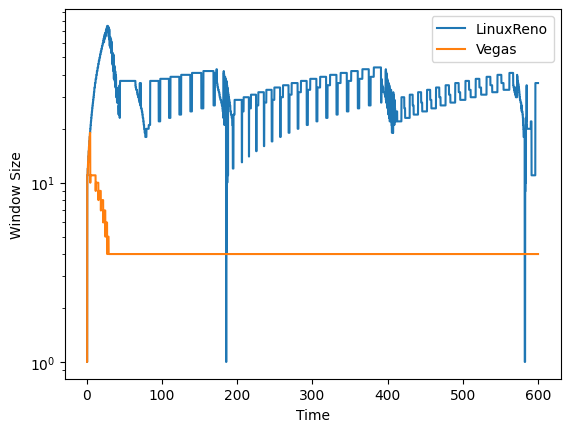

In [25]:
fig, ax = plt.subplots()

metric = 'Window Size'
for mechanism in CONGESTION_MECHANISMS:
    # Filter the data for the current data ID
    mechanism_data = data[(data['Algorithm'] == mechanism) & (data['Flow ID'] == 0)]
    
    # Create the plot
    ax.plot(mechanism_data['Time'], mechanism_data[metric], label=f'{mechanism}')

# Add labels and legend to the plot
ax.set_xlabel('Time')
ax.set_ylabel(metric)
ax.set_yscale('log')
ax.set_xscale('linear')

# Show the plot
plt.legend()
plt.show()
plt.close()